## Work
1. 請嘗試將 preproc_x 替換成以每筆資料的 min/max 進行標準化至 -1 ~ 1 間，再進行訓練
2. 請嘗試將 mlp 疊更深 (e.g 5~10 層)，進行訓練後觀察 learning curve 的走勢
3. (optional) 請改用 GPU 進行訓練 (如果你有 GPU 的話)，比較使用 CPU 與 GPU 的訓練速度

In [4]:
## 
"""
Your code here (optional)
確認硬體資源
"""
#設定路徑後在cmd下查看nvidia-smi.exe -h OK

'\nYour code here (optional)\n確認硬體資源\n'

In [22]:
import os
import keras
import numpy as np

# 請嘗試設定 GPU：os.environ
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

In [6]:
train, test = keras.datasets.cifar10.load_data()

In [30]:
## 資料前處理
"""
Your code here
"""
def preproc_x(x, flatten=True):
    x = (x - np.mean(x)) / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [31]:
x_train, y_train = train
x_test, y_test = test

In [32]:
# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [39]:
"""Code Here
建立你的神經網路
"""
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 256, 128, 128, 64, 32, 16]): #8層
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

model = build_mlp(input_shape=x_train.shape[1:])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 256)               65792     
_________________________________________________________________
hidden_layer4 (Dense)        (None, 128)               32896     
_________________________________________________________________
hidden_layer5 (Dense)        (None, 128)               16512     
_________________________________________________________________
hidden_layer6 (Dense)        (None, 64)                8256      
__________

In [40]:
## 超參數設定
LEARNING_RATE = 0.001
EPOCHS = 100
BATCH_SIZE = 256

In [41]:
optimizer = keras.optimizers.Adam(lr=LEARNING_RATE)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

In [42]:
model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 7s 139us/step - loss: 1.8015 - acc: 0.3606 - val_loss: 1.5877 - val_acc: 0.4382
Epoch 2/100
50000/50000 [==============================] - 4s 75us/step - loss: 1.5186 - acc: 0.4657 - val_loss: 1.4796 - val_acc: 0.4752
Epoch 3/100
50000/50000 [==============================] - 4s 85us/step - loss: 1.3882 - acc: 0.5123 - val_loss: 1.4115 - val_acc: 0.5020
Epoch 4/100
50000/50000 [==============================] - 4s 78us/step - loss: 1.2814 - acc: 0.5507 - val_loss: 1.4061 - val_acc: 0.5151
Epoch 5/100
50000/50000 [==============================] - 3s 65us/step - loss: 1.1926 - acc: 0.5844 - val_loss: 1.3632 - val_acc: 0.5239
Epoch 6/100
50000/50000 [==============================] - 3s 63us/step - loss: 1.1106 - acc: 0.6080 - val_loss: 1.3476 - val_acc: 0.5397
Epoch 7/100
50000/50000 [==============================] - 4s 73us/step - loss: 1.0293 - acc: 0.6362 - val_loss: 1.3576 -

50000/50000 [==============================] - 4s 77us/step - loss: 0.0839 - acc: 0.9724 - val_loss: 3.3518 - val_acc: 0.5308
Epoch 60/100
50000/50000 [==============================] - 3s 61us/step - loss: 0.0871 - acc: 0.9708 - val_loss: 3.3267 - val_acc: 0.5341
Epoch 61/100
50000/50000 [==============================] - 3s 67us/step - loss: 0.0965 - acc: 0.9683 - val_loss: 3.0171 - val_acc: 0.5263
Epoch 62/100
50000/50000 [==============================] - 3s 68us/step - loss: 0.0804 - acc: 0.9747 - val_loss: 3.3442 - val_acc: 0.5330
Epoch 63/100
50000/50000 [==============================] - 3s 62us/step - loss: 0.0775 - acc: 0.9749 - val_loss: 3.1014 - val_acc: 0.5329
Epoch 64/100
50000/50000 [==============================] - 3s 60us/step - loss: 0.0821 - acc: 0.9730 - val_loss: 3.2356 - val_acc: 0.5264
Epoch 65/100
50000/50000 [==============================] - 4s 71us/step - loss: 0.0819 - acc: 0.9739 - val_loss: 3.3677 - val_acc: 0.5287
Epoch 66/100
50000/50000 [==============

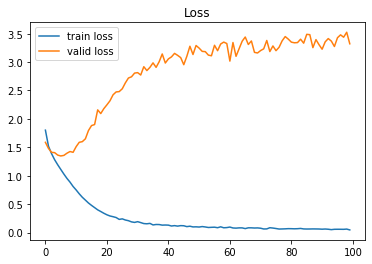

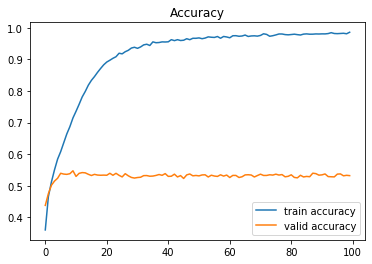

In [43]:
import matplotlib.pyplot as plt


train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()